# PART 1, MODULES, CLASSES AND NAMESPACES

In [1]:
import python_examples as pex
print(pex.hello_world_class.text)

ModuleNotFoundError: No module named 'python_examples'

### We modify the python_example.py (changing the 7th line to: text = "test2"), and re-import it

In [2]:
import python_examples as pex

print(pex.hello_world_class.text)

test


### we need to use the importlib module function importlib.reload(Oject)

In [71]:
import importlib as im

im.reload(pex)

print(pex.hello_world_class.text)

ModuleNotFoundError: spec not found for the module 'python_examples'

### Lets see what does the fact that the module pex and the class are singletons means:

Lets change text="default" and import a second module python_example

In [4]:
import python_examples as pex2
print(pex.hello_world_class.text)
print(pex2.hello_world_class.text)

test2
test2


### Lets change the variable text in the pex modul:

In [5]:
pex.hello_world_class.text = "test3"
print(pex.hello_world_class.text)
print(pex2.hello_world_class.text)

test3
test3


### Lets reload only pex2

In [6]:
im.reload(pex2)
print(pex.hello_world_class.text)
print(pex2.hello_world_class.text)

default
default


## NAMSPACE

### Lets try to call the method say_it

In [7]:
pex.hello_world_class.say_it()

hello world


In [8]:
print(pex.hello_world_class.text)
print(pex2.hello_world_class.text)

default
default


### Oh! text have not been updated! (Reminder: a namespace is a list of name, and the scope of this namespace is the area in the code where this namespace is valid)

In [9]:
#var1 var2 var3 are in the global namespace
var1 = 1
var2 = 1
var3 = 1

def some_func(): 
    
    var2 = 6
    
    def some_inner_func(): 
        
        var3 = 7
        print("within some_inner_func: ",
          "var1:",var1,
          "var2:",var2,
          "var3:",var3)
        
    print("within some_func, before the call of some_inner_func: ",
          "var1:",var1,
          "var2:",var2,
          "var3:",var3)
    some_inner_func()
    print("within some_func, before the call of some_inner_func: ",
          "var1:",var1,
          "var2:",var2,
          "var3:",var3)
    
print("at global scope, before execution of some_func: ",
          "var1:",var1,
          "var2:",var2,
          "var3:",var3)
some_func()
print("at global scope, after execution of some_func: ",
          "var1:",var1,
          "var2:",var2,
          "var3:",var3)



at global scope, before execution of some_func:  var1: 1 var2: 1 var3: 1
within some_func, before the call of some_inner_func:  var1: 1 var2: 6 var3: 1
within some_inner_func:  var1: 1 var2: 6 var3: 7
within some_func, before the call of some_inner_func:  var1: 1 var2: 6 var3: 1
at global scope, after execution of some_func:  var1: 1 var2: 1 var3: 1


### Lets now make var2 and var3 global (var1 is unused in the functions, so no need to make it global)

In [10]:
#var1 var2 var3 are in the global namespace
var1 = 1
var2 = 1
var3 = 1

def some_func(): 
    # var2 is in the global namespace 
    global var2  
    var2 = 6
    
    def some_inner_func(): 
        # var3 is in the global namespace 
        global var3;
        var3 = 7
        print("within some_inner_func: ",
          "var1:",var1,
          "var2:",var2,
          "var3:",var3)
        
    print("within some_func, before the call of some_inner_func: ",
          "var1:",var1,
          "var2:",var2,
          "var3:",var3)
    some_inner_func()
    print("within some_func, before the call of some_inner_func: ",
          "var1:",var1,
          "var2:",var2,
          "var3:",var3)
    
print("at global scope, before execution of some_func: ",
          "var1:",var1,
          "var2:",var2,
          "var3:",var3)
some_func()
print("at global scope, after execution of some_func: ",
          "var1:",var1,
          "var2:",var2,
          "var3:",var3)



at global scope, before execution of some_func:  var1: 1 var2: 1 var3: 1
within some_func, before the call of some_inner_func:  var1: 1 var2: 6 var3: 1
within some_inner_func:  var1: 1 var2: 6 var3: 7
within some_func, before the call of some_inner_func:  var1: 1 var2: 6 var3: 7
at global scope, after execution of some_func:  var1: 1 var2: 6 var3: 7


### BACK TO THE CLASS

### Lets go back to our example, and replace "text=..." by "self.text=..." in say_it() (to say that we refere to the "text" variable in the the class namespace) 

In [14]:
im.reload(pex)
pex.hello_world_class.say_it()
print(pex.hello_world_class.text)

NameError: name 'self' is not defined

### indeed!!! where did we define "self", so lets put it in the argument of the method...

In [15]:
im.reload(pex)
pex.hello_world_class.say_it()

TypeError: say_it() missing 1 required positional argument: 'self'

### Q: what "self" should be? A: it should be the object itself...

In [16]:
pex.hello_world_class.say_it(pex.hello_world_class)

NameError: name 'text' is not defined

### Indeed the "text" variable have never been assigned to the "say_it" method namespace! But self.text is declared in the namespace of the class (line 7).

In [17]:
im.reload(pex)
pex.hello_world_class.say_it(pex.hello_world_class)

hello world


### And now the variable "text" has been updated! Lets remind us that modules and class are singletons:

In [18]:
print(pex.hello_world_class.text)
print(pex2.hello_world_class.text)

hello world
hello world


### But I would like to work with multiple "hello_world_class", BUT A CLASS IS A SINGLETON!!!

Instance are not signleton, they are new objects which are a (deep) copy of the class object.
This copy is managed by the constructor "()" method of the class object 
This method "()" is automatically generated by the interpreter:

In [24]:
im.reload(pex)
hello_world_instance = pex.hello_world_class()
hello_world_instance2 = pex.hello_world_class()
print(hello_world_instance.text)
print(hello_world_instance2.text)

default
default


In [25]:
hello_world_instance.say_it()
print(hello_world_instance.text)
print(hello_world_instance2.text)

say:  hello world
hello world
default


### That's finaly it! hello_world_instance and hello_world_instance2 are two different instance of the class hello_world_class

note: now we dont have to pass the instance in the "say_it" function. The interpreter do it for us, this implies that the first argument in a method declaration (which aims to be used on instance, internal function are exceptions)

Lets add a explicit constructor to the class by adding the method "__init__(self)":

In [27]:
im.reload(pex)
hello_world_instance = pex.hello_world_class()

constructor called


### AS IN PYTHON: "We are (nearly) all consenting adults and our bedroom is open" (which allow most of the weird behaviour we just saw). It is advised to declare and initialize (which is done in one step in python (except for global variables)) variables in the constructor...

In [29]:
im.reload(pex)
hello_world_instance = pex.hello_world_class()
hello_world_instance.say_it()

constructor called
say:  hello world


### So now the class "hello_world_class" namespace does not have the variable "text" in it, but the instances of "hello_world_class" have !!!

Quite advanced tip: indeed, it means that members of a class/instance can be dynamically inserted (logic as class and instance are objects in python and one have to be allowed to add "elements" to an object). You can have multiple instance of a same class which does not have the same members, this can be dangerous but also sometime useful !!! 

In [30]:
print(hello_world_instance.text)
print(pex.hello_world_class.text)

hello world


AttributeError: type object 'hello_world_class' has no attribute 'text'

In [37]:
im.reload(pex)
hello_world_instance = pex.hello_world_class("BLABLABLA")
print(hello_world_instance.text)
hello_world_instance = pex.hello_world_class()
print(hello_world_instance.text)

TypeError: __init__() takes 1 positional argument but 2 were given

In [40]:
import numpy as np
np.array = 2
print(np.array)
im.reload(np)

2


<module 'numpy' from '/opt/anaconda3/lib/python3.7/site-packages/numpy/__init__.py'>

### If you want your variable to be global, in a class it will work just as for a function:

In [44]:
text = "test"
class hello_world_class:
    
    def __init__(self):
        print("constructor called")
        global text
        text="default"
    def say_it(self):
        global text
        text = "hello world"
        print(text)
        
hwc = hello_world_class()
print(text)
hwc.say_it()
print(text)

constructor called
default
hello world
hello world


BUT and it is a big BUT:

global variable in a module are "global just for the module", the module namespace is separated, therefore you will have:

In [43]:
global text
text = "AHAH"
import python_examples2 as pex3
im.reload(pex3)
print(pex3.text)
hwc = pex3.hello_world_class()
print(pex3.text)
print(hwc.text)
print(text)

test
constructor called
default


AttributeError: 'hello_world_class' object has no attribute 'text'

## Class inheritence....
As an exercice... follow document: https://www.geeksforgeeks.org/inheritance-in-python/

In [46]:
class animal:

    def __init__(self, race):
        self.race = race
    def getRace(self):
        return self.race

class dog(animal):
    def __init__(self,race, name):
        self.name = name
        animal.__init__(self, race)
        
        
rex = dog("chiwawa","rex")
print(rex.race)
print(rex.name)
print(rex.getRace())

chiwawa
rex
chiwawa


In [47]:
class animal:

    def __init__(self, race):
        self.race = race
    def getRace(self):
        return self.race

class dog(animal):
    def __init__(self, race, name):
        self.name = name
        ##animal.__init__(self, race)
        
        
rex = dog("chiwawa","rex")
print(rex.race)
print(rex.name)
print(rex.getRace())

AttributeError: 'dog' object has no attribute 'race'

In [48]:
class animal:

    def __init__(self, race):
        self.race = race
    def getRace(self):
        return self.race

class dog:
    def __init__(self, race, name):
        self.name = name
        animal.__init__(self, race)
        
        
rex = dog("chiwawa","rex")
print(rex.race)
print(rex.name)
print(rex.getRace())

chiwawa
rex


AttributeError: 'dog' object has no attribute 'getRace'

In [49]:
class animal:

    def __init__(self, race):
        self.race = race
    def getRace(self):
        return self.race

class dog(animal):
    def __init__(self, race, name):
        self.name = name
        animal.__init__(self, race)
        
        
rex = dog("chiwawa","rex")
print(rex.race)
print(rex.name)
print(rex.getRace())

chiwawa
rex
chiwawa


DO NOT FORGET THE NAMING CONVENSION IN CLASSES:

variable starting with one _ are protected, this means that only the "childs" should modified this variable
variable starting with one __ are private, this means that one should touch those variable only in the class

(people also use this convention for methods, but not always... 
_ Methods, should not be called outside the class or its childs
__ Methods, should never be called outside the class (hihi except __init__() !!)

Create wrapper to _ __ variable/method (getVariable, setVariable) 
publicMethod(): 
    __privateMethod()


In [53]:
class animal:

    def __init__(self, race):
        self.race = race
        self.__private = "dskjhdsf"
        self._protected = "protected"
    def getRace(self):
        return self.race
    def getPrivate(self):
        return self.__private
    def __getRace(self):
            return self.race
    

In [54]:
a = animal("test")
print(a._protected)
print(a.getPrivate())
print(a.__private)

protected
dskjhdsf


AttributeError: 'animal' object has no attribute '__private'

In [52]:
a.__getRace()

AttributeError: 'animal' object has no attribute '__getRace'

In [ ]:
So one can have private member, but not protected!

# DATATYPE and DATA STRUCTURE

### In python variable are not declared explicitely. They are declared at first assignment. So if you assign a variable within a given namespace it will declare it if this variable is not yet in that namespace.

## Numerics and Boolean and assignement.


In [55]:
a=1
b=2.5
c=complex(1,2)
d=True
f='e'
print(a,type(a))
print(b,type(b))
print(c,type(c))
print(d,type(d))
print(f,type(f))


1 <class 'int'>
2.5 <class 'float'>
(1+2j) <class 'complex'>
True <class 'bool'>
e <class 'str'>


In [58]:
a=b
print(a,type(a),id(a))
print(b,type(b),id(b))

2.5 <class 'float'> 4464485872
2.5 <class 'float'> 4464485872


In [59]:
b=1
print(a,type(a),id(a))
print(b,type(b),id(b))

2.5 <class 'float'> 4464485872
1 <class 'int'> 4400342160


As you see in python you do not have to give the type of a variable at declaration, which make sense as all variable are references (so a long...). 

Think a about a=1:

1) a Int instance storing 1 is created at a given reference "ref"

2) the reference associated to a is updated to be "ref"

## Sequence: string,list,tuple

### in python there is 3 "Sequence type": strings, list and tuple.

In [60]:
a="aString"
b=(1,"as",2.3)
c=[1,"as",2.3]
print(a,type(a))
print(b,type(b))
print(c,type(c))


aString <class 'str'>
(1, 'as', 2.3) <class 'tuple'>
[1, 'as', 2.3] <class 'list'>


In [66]:
a='aString'
b="anotherString"
c='''another
string'''

print(c)
print(a,type(a))
print(a[0],type(a[0]))
print(b,type(b))
print(c,type(c))
c[0] = '2'

another
string
aString <class 'str'>
a <class 'str'>
anotherString <class 'str'>
another
string <class 'str'>


TypeError: 'str' object does not support item assignment

In [62]:
aTuple = (1,2,3)
print(aTuple,type(aTuple),type(aTuple[0]),id(aTuple))

aTuple = ((1,2),(3,4))
print(aTuple,aTuple[0][0],aTuple[0][1],aTuple[1][0],aTuple[1][1])


aTuple[0]=2


(1, 2, 3) <class 'tuple'> <class 'int'> 4442053360
((1, 2), (3, 4)) 1 2 3 4


TypeError: 'tuple' object does not support item assignment

In [67]:
aList = [1,2,3]
print(aList,type(aList),id(aList))

bList=aList
bList[0]=4
print(aList,type(aList),id(aList),id(bList))

aList = [1,2,3]
bList=aList[:]
bList[0]=4
print(bList,type(bList),id(bList))
print(aList,type(aList),id(aList))


[1, 2, 3] <class 'list'> 4442002128
[4, 2, 3] <class 'list'> 4442002128 4442002128
[4, 2, 3] <class 'list'> 4594983552
[1, 2, 3] <class 'list'> 4595057280


Tuples protect you agains this:

In [47]:
class hello_world_class:

    def __init__(self,text):
        self.text = text

    def say_it(self):
        print(self.text)
        
a = hello_world_class("text a")
b = hello_world_class("text b")
c = hello_world_class("text c")
aList = (a,b,c)
print(aList,"\n",id(a),id(aList[0]))
aList[0] = b
print(aList,"\n",id(a),id(b),id(aList[0]))

(<__main__.hello_world_class object at 0x1083dc590>, <__main__.hello_world_class object at 0x1083dc0d0>, <__main__.hello_world_class object at 0x1083dc150>) 
 4433233296 4433233296


TypeError: 'tuple' object does not support item assignment

In [48]:


a = hello_world_class("text a")
b = hello_world_class("text b")
c = hello_world_class("text c")
aList = ([a],[b],[c])
print(aList,"\n",id(a),id(aList[0]))
aList[0][0] = b
print(aList,"\n",id(a),id(b),id(aList[0][0]))

([<__main__.hello_world_class object at 0x1083dd610>], [<__main__.hello_world_class object at 0x1083dde50>], [<__main__.hello_world_class object at 0x1083ddf90>]) 
 4433237520 4408508240
([<__main__.hello_world_class object at 0x1083dde50>], [<__main__.hello_world_class object at 0x1083dde50>], [<__main__.hello_world_class object at 0x1083ddf90>]) 
 4433237520 4433239632 4433239632


## Dictionary and set

### a dictionnary is a Hashmap
So you can retrive element very efficiently using a "key".

In [68]:
aDict = {"un":1,"deux":2.0,"trois":3}
print(aDict,aDict['un'],type(aDict['un']),type(aDict['deux']))

{'un': 1, 'deux': 2.0, 'trois': 3} 1 <class 'int'> <class 'float'>


In [69]:
class hello_world_class:

    def __init__(self,text):
        self.text = text

    def say_it(self):
        print(self.text)

In [50]:
a = hello_world_class("text a")
b = hello_world_class("text b")
c = hello_world_class("text c")
aDict = {"un":a,"deux":b,"trois":c}
aDict["un"].say_it()
print(id(a),id(aDict["un"]))

text a
4433239888 4433239888


In [26]:
aDict["un"] = b
aDict["un"].say_it()
print(aDict,"\n",id(a),id(b),id(aDict["un"]))

text b
{'un': <__main__.hello_world_class object at 0x1117325d0>, 'deux': <__main__.hello_world_class object at 0x1117325d0>, 'trois': <__main__.hello_world_class object at 0x111732850>} 
 4587725136 4587726288 4587726288


In [35]:
aDict["quatre"] = a
aDict["quatre"].say_it()
print(aDict)
a.text = "hehe"
print(a.text)
aDict["quatre"].say_it()

hehe
{'un': <__main__.hello_world_class object at 0x1117325d0>, 'deux': <__main__.hello_world_class object at 0x1117325d0>, 'trois': <__main__.hello_world_class object at 0x111732850>, 'quatre': <__main__.hello_world_class object at 0x111732150>}
hehe
hehe


In [36]:
aDict.pop("quatre")
print(aDict)

{'un': <__main__.hello_world_class object at 0x1117325d0>, 'deux': <__main__.hello_world_class object at 0x1117325d0>, 'trois': <__main__.hello_world_class object at 0x111732850>}


In [37]:
aDict["quatre"]


KeyError: 'quatre'

### a set is a hashtable

So you can add/remove element very efficiently. It is also very efficient to check if an element is in the set.

In [17]:
aSet = set(["un",2,2.3])
print(aSet,type(aSet))

{'un', 2, 2.3} <class 'set'>


In [18]:
aSet.add(4)
print(aSet,type(aSet))

{'un', 2, 2.3, 4} <class 'set'>


In [19]:
print("un" in aSet)
aSet.remove("un")
print("un" in aSet)
print(aSet,type(aSet))

True
False
{2, 2.3, 4} <class 'set'>


In [51]:
aSet[3]

NameError: name 'aSet' is not defined

# Looping in Python

In [71]:
aL = list(range(0,5))
bL = list(range(0,5))
print(type(aL),type(aL[0]),len(aL))
aT = tuple(range(20,23))
bT = tuple(range(20,23))
print(type(aT),type(aT[0]),len(aT))

aDict = {"un":1,"deux":2,"trois":3}
aSet = set(["bli","bla","blo"])
for a in aL:
    print(a)
for a in aT:
    print(a)
for a in aDict:
    print(a)
for a in aSet:
    print(a)


<class 'list'> <class 'int'> 5
<class 'tuple'> <class 'int'> 3
0
1
2
3
4
20
21
22
un
deux
trois
bli
blo
bla


In [72]:
for i in range(2,13,2):
    print(i)

2
4
6
8
10
12


In [73]:
cL = aL+bL
print(len(cL))
for i in cL :
    print(i)
print("========")
cT = aT+bT
print(len(cT))
for i in cT :
    print(i)

10
0
1
2
3
4
0
1
2
3
4
6
20
21
22
20
21
22


Yes the + operator is overloaded for list by an append!

In [118]:
d=[]
d[:] = aL[:]+bL[:]
print(len(d),type(d),aL[:])
for i in d :
    print(i)

10 <class 'list'> [0, 1, 2, 3, 4]
0
1
2
3
4
0
1
2
3
4


In [77]:
for i in aL:
    print(i,type(i))
    i=3;
    
print(aL,type(aL),type(aL[0]),len(aL))

for i in range(0,len(aL)):
    aL[i] = 3
    
print(aL,type(aL),type(aL[0]),len(aL))

for i,a in enumerate(aL):
    aL[i] = 4
    a=5
print(aL,type(aL),type(aL[0]),len(aL))

4 <class 'int'>
4 <class 'int'>
4 <class 'int'>
4 <class 'int'>
4 <class 'int'>
[4, 4, 4, 4, 4] <class 'list'> <class 'int'> 5
[3, 3, 3, 3, 3] <class 'list'> <class 'int'> 5
[4, 4, 4, 4, 4] <class 'list'> <class 'int'> 5


In [39]:
But python loops are very slow -> the array datatype (from Array or numpy, here we will use numpy ones)

SyntaxError: invalid syntax (<ipython-input-39-a9da27266c4c>, line 1)

In [78]:
import numpy as np


In [80]:
size = 10
a = np.array([1.,2.,3.])
print(a)
a = np.zeros(5)
print(a)
a = np.zeros([5,5])
print(a)
a = np.array(range(0,size))
print(a)
b = np.array(range(0,size))
print(a)

[1. 2. 3.]
[0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [83]:

d=a[:]+b[:]
print(d, type(d))

[ 0  2  4  6  8 10 12 14 16 18] <class 'numpy.ndarray'>


In [84]:
c = np.array(10)
c=2*a[:]+b[:]/10
print(c, type(c),type(c[:]))

[ 0.   2.1  4.2  6.3  8.4 10.5 12.6 14.7 16.8 18.9] <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [79]:
c= 2*a + b/10
print(c, type(c))

[ 0.   2.1  4.2  6.3  8.4 10.5 12.6 14.7 16.8 18.9] <class 'numpy.ndarray'>


In [82]:
The evidently one can:

SyntaxError: invalid syntax (<ipython-input-82-debcfc4ea508>, line 1)

In [85]:
for i,(x,y) in enumerate(zip(a,b)):
    c[i] = 2*x+y/10
print(c, type(c))

[ 0.   2.1  4.2  6.3  8.4 10.5 12.6 14.7 16.8 18.9] <class 'numpy.ndarray'>


In [88]:
## What is the differences?

Object `differences` not found.


In [87]:
import time

size = 1000000
a=np.array(range(0,size))
b=np.array(range(0,size))
c=np.array(size)

start = time.time()
c = 2*a+b/10
end = time.time()

print(end - start)
print("===========")

start = time.time()
c[:] = 2*a[:]+b[:]/10
end = time.time()
print(end - start)
print("===========")

start = time.time()
for i,(x,y) in enumerate(zip(a,b)):
    c[i] = 2*x+y/10
end = time.time()
print(end - start)
print("===========")

0.006938934326171875
0.008228063583374023
3.626924991607666


In [88]:
a = np.array(range(1,11))
a = 2*a
print(a[:])
print(a[-3])
print(a[-3:])
print(a[:-3])
print(a[0:10:3])
print(a[::-1])
print(a[9:1:-1])

[ 2  4  6  8 10 12 14 16 18 20]
16
[16 18 20]
[ 2  4  6  8 10 12 14]
[ 2  8 14 20]
[20 18 16 14 12 10  8  6  4  2]
[20 18 16 14 12 10  8  6]


In [63]:
a derivative

SyntaxError: invalid syntax (<ipython-input-63-2508f9c7dc50>, line 1)

In [66]:
c = a[1:]-a[:9]
print(c)

[2 2 2 2 2 2 2 2 2]


In [69]:
ashift = np.roll(a,-1)
print(ashift)

[ 4  6  8 10 12 14 16 18 20  2]


In [75]:
c = np.roll(a,-1) - a
print(c)
c = a - np.roll(a,1)
print(c)
c = (np.roll(a,-1) - np.roll(a,1))/2
print(c)

[  2   2   2   2   2   2   2   2   2 -18]
[-18   2   2   2   2   2   2   2   2   2]
[-8.  2.  2.  2.  2.  2.  2.  2.  2. -8.]


In [76]:
lets see it with the function sin and cos:

SyntaxError: invalid syntax (<ipython-input-76-a8f7be545124>, line 1)

In [124]:
size = 30
dx = 2.0 * np.pi / size 
x = np.array(range(0,size)) * dx
sinx = np.sin(x)
cosx = np.cos(x)

In [125]:
import matplotlib.pyplot as plt

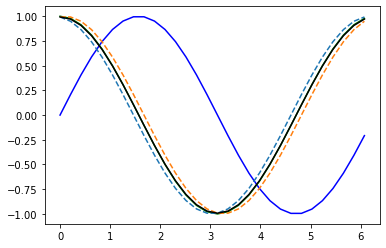

In [126]:
plt.plot(x,sinx,"blue")
plt.plot(x,cosx,"green")
plt.plot(x,(np.roll(sinx,-1) - sinx)/ dx, "--")
plt.plot(x,(sinx - np.roll(sinx,1))/ dx, "--")
plt.plot(x,(np.roll(sinx,-1) - np.roll(sinx,1))/(2.0*dx),"black")

### Advanced: A bit on parallelisation:
Becomes really relevant on multicores! 

In [89]:
import time
import threading
import numpy as np

size = 100000000




In [90]:
a=np.array(range(0,size))
b=np.array(range(0,size))
c=np.array(size)


In [93]:
start = time.time()
c = 2*a+b/10
end = time.time()
print(end - start)
print("===========")

def task(a,b,c):
    c = 2*a+b/10

blocks = 10;
blocks_size = size//blocks



thread_pool = []
for i in range(blocks):
    start = i*blocks_size
    end = (i+1)*blocks_size
    thread_pool.append(threading.Thread(target=task, args=(a[start:end],b[start:end],c[start:end])) )
    


start = time.time()
for tr in thread_pool:  
    tr.start()
for tr in thread_pool:
    tr.join()
end = time.time()
print(end - start)
print("===========")


1.339944839477539
0.6542580127716064


In [12]:
Conditions: 

SyntaxError: invalid syntax (<ipython-input-12-1e4a6926492a>, line 1)

In [26]:
if True :
    print("hello")

hello


In [28]:
a = 3
b = 4
if a<=b :
    print("hello")
else:
    print("bye")

hello


In [53]:
a = "dadadada"
b = "dadadadb"
if a<b :
    print("bigger")
elif a>b:
    print("smaller")
else:
    print("equal")

bigger


In [56]:
a = [1,2,3]
if 1 in a:
    print("ok")

ok


In [18]:
dict = {"un":1,"deux":2}
if "un" in dict:
    print("in")
else:
    print("not in")
if 1 in dict:
    print("in")
else:
    print("not in")
if "trois" in dict:
    print("in")
else:
    print("not in")
print(dict["un"])

in
not in
not in
1


# Exceptions

In [94]:
dict = {"un":1,"de":2}
dict["deux"]

KeyError: 'deux'

In [95]:
try :
    dict["deux"]
except:
    print("cant do it, the key does not exist")


cant do it, the key does not exist


In [96]:
try :
    dict["deux"]
except Exception as e:
    print(type(e),e)

<class 'KeyError'> 'deux'


In [97]:
try :
    dict["deux"]
except KeyError:
    print("cant do it, the key does not exist")

cant do it, the key does not exist


In [122]:
aSet = set([1,2,3])
try: 
    aSet[1] = -1
except Exception as e:
    print(type(e),e)
    aSet.remove(1)
    aSet.add(-1)
    print(aSet)

    

<class 'TypeError'> 'set' object does not support item assignment
{2, 3, -1}


# Args and Kwargs

In [99]:
def funct(a,*args,**kwargs):
    print(a)
    print(args, type(args))
    print(kwargs, type(kwargs))

In [102]:
funct("a","args1","args2",test=("kwargs_test",26),test2="kwargs_test2" )

a
('args1', 'args2') <class 'tuple'>
{'test': ('kwargs_test', 26), 'test2': 'kwargs_test2'} <class 'dict'>


In [103]:
def funct(**krawrg):
    for i in krawrg:
        print(i,krawrg[i])

In [104]:
funct(animal="cat",color="blue")

animal cat
color blue


In [106]:
class animals:
    def __init__(self,**kwargs):
        self.race = "none"
        self.size = -1
        self.color = "none"

rex = animals()
print(rex.race,rex.size,rex.color)
rex = animals(race="dog",color="blue")
print(rex.race,rex.size,rex.color)

none -1 none
none -1 none


In [108]:
class animals:
    def __init__(self,**kwargs):
        self.race = "none"
        self.size = -1
        self.color = "none"
        for item in kwargs:
            try:
                self.__dict__[item]=kwargs[item]
            except:
                pass

rex = animals(race="dog",color="blue")
print(rex.race,rex.size,rex.color)
rex = animals(race="race",color="blue",add="ohh")
print(rex.race,rex.size,rex.color,rex.add)

dog -1 blue
race -1 blue ohh


In [2]:
class animals:
    def __init__(self,**kwargs):
        self.race = "none"
        self.size = -1
        self.color = "none"
        self.__dict__.update(kwargs)
    def print_animal(self):
        for i in self.__dict__:
            print(i, " : ", self.__dict__[i] )
        

rex = animals(race="dog",color="blue",add="ohh")
rex.print_animal()

race  :  dog
size  :  -1
color  :  blue
add  :  ohh


In [109]:
class dataHolder:
    def __init__(self,**kwargs):
        
        self.__dict__.update(kwargs)
    def print_data(self):
        for i in self.__dict__:
            print(i, ":", self.__dict__[i] )
rex = dataHolder(race="dog",color="blue",add="ohh")

rex.print_data()
print(rex.race,rex.color,rex.add)

race : dog
color : blue
add : ohh
dog blue ohh


In [111]:
import matplotlib.pyplot as plt
import numpy as np

def plot_lines(x,y,*args):
    plt.plot(x,y);
    for i,ya in enumerate(args):
        plt.plot(x,ya)

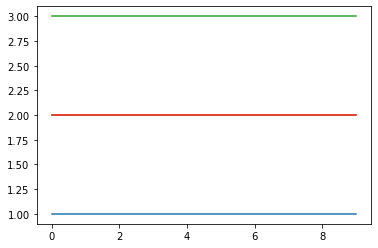

In [113]:
x = np.array(range(10))
y = np.full(10,1)
y2 = np.full(10,2)
y3 = np.full(10,3)
plot_lines(x,y,y2,y3,y2)

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_lines_factor(x,y,*args,**kwargs):
    
    if "factors" in kwargs:
        if isinstance(kwargs['factors'],list):
            factors = kwargs['factors']
            if len(factors)<len(args):
                factors += [1] * (len(args) - len(factors))
                
        else:
            factors = [kwargs['factors']] * len(args)
    else:
        factors = [1] * len(args)
    
    plt.plot(x,y);
    for i,ya in enumerate(args):
        plt.plot(x,factors[i]*ya)
    
    

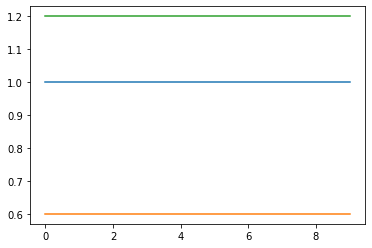

In [10]:
plot_lines_factor(x,y,y2,y3,factors=[0.3,0.4])

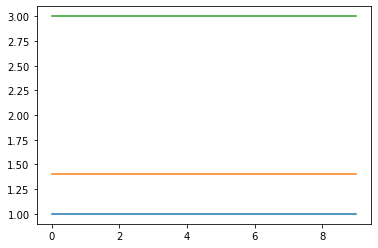

In [118]:
plot_lines_factor(x,y,y2,y3,factors=[0.7])

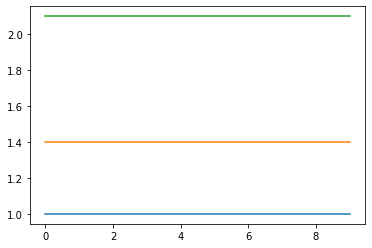

In [119]:
plot_lines_factor(x,y,y2,y3,factors=0.7)

In [137]:
# By value or by reference!!!

In [153]:
a = 1
b = 2
print(a,b,id(a),id(b))
a=b
print(a,b,id(a),id(b))
b = 1
print(a,b,id(a),id(b))

1 2 4364711056 4364711088
2 2 4364711088 4364711088
2 1 4364711088 4364711056


In [154]:
a = [1,2,3]
b = [4,5,6]
print(a,b,id(a),id(b))
a=b
print(a,b,id(a),id(b))
b = [4,5,6]
print(a,b,id(a),id(b))

[1, 2, 3] [4, 5, 6] 4618673280 4616377840
[4, 5, 6] [4, 5, 6] 4616377840 4616377840
[4, 5, 6] 1 4616377840 4364711056


In [156]:
def f(a):
    a = 2
a = 1
f(a)
print(a)

1


In [159]:
def f(a):
    a[0] = 2
a = [1]
f(a)
print(a)

[2]


In [142]:
def f(a,b):
    a = b
    print(a,b,id(a),id(b))

In [143]:
a = 1
b = 2
print(a,b,id(a),id(b))
f(a,b)
print(a,b,id(a),id(b))

1 2 4364711056 4364711088
2 2 4364711088 4364711088
1 2 4364711056 4364711088


In [146]:
def f(a,b):
    a = b
    a[0] = 7
    print(a,b,id(a),id(b))

In [147]:
a = [1,2,3]
b = [4,5,6]
print(a,b,id(a),id(b))
f(a,b)
print(a,b,id(a),id(b))

[1, 2, 3] [4, 5, 6] 4425706384 4617032960
[7, 5, 6] [7, 5, 6] 4617032960 4617032960
[1, 2, 3] [7, 5, 6] 4425706384 4617032960


In [4]:
class someData:
    data = 1
    
a = someData()
a.data = 1
b = someData()
b.data = 2
print(a.data,b.data,id(a.data),id(b.data))
def f(a,b):
    a.data = b.data
    print(a.data,b.data,id(a.data),id(b.data))
    
f(a,b)
print(a.data,b.data,id(a.data),id(b.data))

#but !!!
a.data = 3
print(a.data,b.data,id(a.data),id(b.data))

1 2 4431889552 4431889584
2 2 4431889584 4431889584
2 2 4431889584 4431889584
3 2 4431889616 4431889584


# Function pointer

Python have no Function pointer but one can turn around this using dictionnary:

In [63]:
def funct(*args):
    return np.sum(args)

In [64]:
dict = {"mySum": funct}

In [67]:
dict["mySum"]([32,32,3,4,23],[32,32,32,32,32])

254

# The "with" keyword

A way to ensure some cleaning even if an exception is thrown.

In [35]:
def isOpen(f):
    if f.closed :
        print("closed")
    else:
        print("open")

with open('output.txt', 'w') as f:
    f.write('Hi there!')
    isOpen(f)
isOpen(f)

open
closed


### Build a class with context manager:

In [43]:
class myFunct:
    def __init__(self,a):
        self.a = a
        print("constructor called")
    def __enter__(self):
        print("we start the with")
        return self.a
    def __exit__(self, type, value, traceback):
        print("we stop the with, so I can do a bit of cleaning/restoring/.....")
try:  
    with myFunct(2) as a:
        print(a[2])
except Exception as e:
    print(type(e),e)

constructor called
we start the with
we stop the with, so I can do a bit of cleaning/restoring/.....
<class 'TypeError'> 'int' object is not subscriptable


### Build a function with a context manager:

In [115]:
def myFunct(a):
    def __enter__():
        print("we start the with")
        return self.a
    def __exit__(type, value, traceback):
        print("we stop the with, so I can do a bit of cleaning/restoring/.....")
    return a

In [116]:
with myFunct(2) as a:
        print(a)

AttributeError: __enter__

### It does not work.... Indeed for function one need to use generators...

# The yield keyword:

In [117]:
def funct(a):
    print("done before yield")
    yield a
    print("done after yield")

In [118]:
for a in funct("test"):
    print(a)

done before yield
test
done after yield


In [55]:
def nextSquare():
    i=1
    while True:
        yield i*i  
        i += 1
print(nextSquare())

<generator object nextSquare at 0x103a48a50>


In [119]:
for num in nextSquare():  
    if num > 100:  
        break    
    print(num)  

1
4
9
16
25
36
49
64
81
100


In [120]:
sq = nextSquare()
print(next(sq))
print(next(sq))
print(next(sq))

1
4
9


In [121]:
class stupidLearning:
    def __init__(self,i):
        self.i = i
    def learn(self,s):
        start = s
        while True:
            start -= 0.1*self.i
            yield start

In [122]:
sL = stupidLearning(3)

In [123]:
for i in sL.learn(2):
    if i<0.5:
        break
    print(i)

1.7
1.4
1.0999999999999999
0.7999999999999998


In [54]:
def print_even(test_string) : 
    for i in test_string: 
        if i == "geeks": 
            yield i 
  
# initializing string 
test_string = " The are many geeks around you, geeks are known for teaching other geeks" 
  
# printing even numbers using yield 
count = 0
print ("The number of geeks in string is : ", end = "" ) 
test_string = test_string.split() 
  
for j in print_even(test_string): 
    count = count + 1
  
print (count) 

The number of geeks in string is : 3


What is the advantage of yield:
    
yield allow to keep all internal data of a function:
- for a search in a large dataset would yield each result and continue to travel the dataset
- during a learning process, one can yield some values and stop the learning with a conditional
- for a data analysis pipeline it allow to keep the memory cost low as, instead of a list, a generator only store the curent state and not the entire list.
- in machine learning generators a typically used to generate batches.

In [69]:
import numpy as np
dataSize = 40
batchSize = 5
a = np.array(range(dataSize))

def batchGenerator(dataSize,batchSize,data):
    nBatch = dataSize//batchSize
    for c in range(nBatch):
        yield data[c*batchSize:(c+1)*batchSize]
        
bg = batchGenerator(dataSize,batchSize,a)

for i in bg:
    print(i)

[0 1 2 3 4]
[5 6 7 8 9]
[10 11 12 13 14]
[15 16 17 18 19]
[20 21 22 23 24]
[25 26 27 28 29]
[30 31 32 33 34]
[35 36 37 38 39]
